<h1>What is the True Normal Human Body Temperature? </h1>
<h2>Audrey Rager</h2>

<h3>Background</h3>

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>


You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<h2>1. Is the distribution of body temperatures normal?</h2>
<ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
        <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
        

<i>First, I'll import packages and read the data into a Pandas dataframe and examine the data.</i>

In [317]:
#Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as random
import scipy.stats as stats
import datetime as dt
import statsmodels.api as sm
from scipy.stats import norm
import statsmodels.stats.weightstats as smsw
import pylab


#Read data into a dataframe
df = pd.read_csv('data/human_body_temperature.csv')

#Explore the data
#Print the header
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [318]:
#print the tail
df.tail()

,temperature,gender,heart_rate
125,96.3,M,70.0
126,97.7,M,77.0
127,98.2,F,73.0
128,97.9,M,72.0
129,98.7,F,59.0


In [319]:
#The readme file says there are no null values; but let's double check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [320]:
#descriptive statistics
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


<b><i>Graphical Normality Tests</i></b>

<i>One graphical method to test for normality is to plot a histogram of the data and compare it to a normal curve.</i>

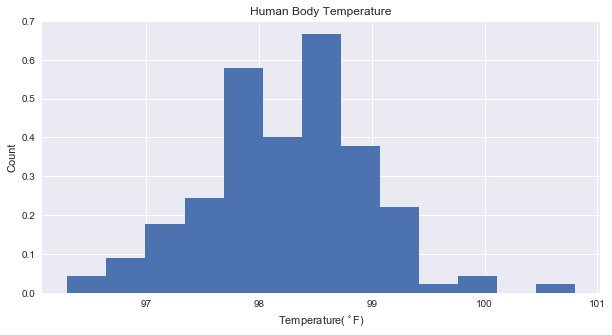

In [321]:
temperature = df['temperature']
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
sns.set()
plt.hist(temperature, bins='auto', density=True)
plt.xlabel('Temperature($^\circ$F)')
plt.ylabel('Count')
plt.title('Human Body Temperature')
plt.show()

<i>The number of bins makes a difference (aka binning bias). In the above histogram, the number of bins was set to "auto" and resulted in 13 bins. With this number of bins, it looks like there is a bimodal distribution with a slight left skew. If this is a bimodal distribution, it's possible it could be due to gender.</i>

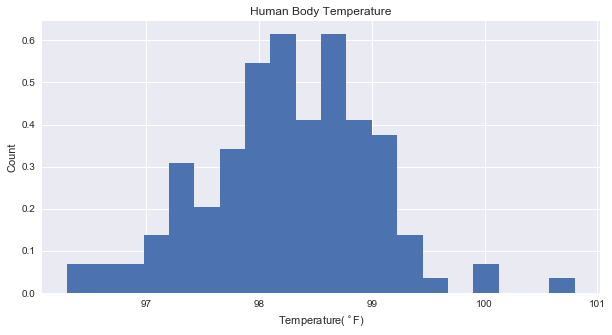

In [322]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
sns.set()
plt.hist(temperature, bins=20, density=True)
plt.xlabel('Temperature($^\circ$F)')
plt.ylabel('Count')
plt.title('Human Body Temperature')
plt.show()

<i>In this histogram with 20 bins the data look like they might have a bimodal distribution and a left skew.</i>

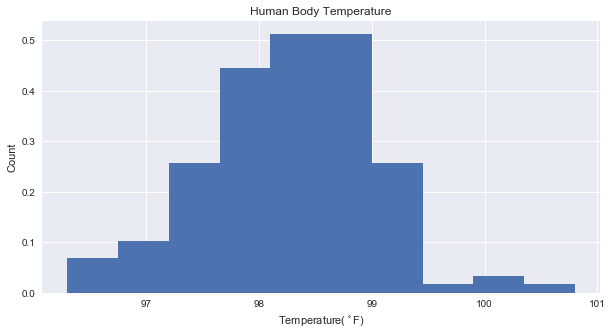

In [323]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
sns.set()
plt.hist(temperature, bins=10, density=True)
plt.xlabel('Temperature($^\circ$F)')
plt.ylabel('Count')
plt.title('Human Body Temperature')
plt.show()

<i>With ten bins, there still appears to be a slight left skew, but the distribution looks fairly normal with a single peak. Another graphical reprsentation of the data we can look at and compare to a normal distribution is the probablity density function shown below.</i>

98.24923076923078


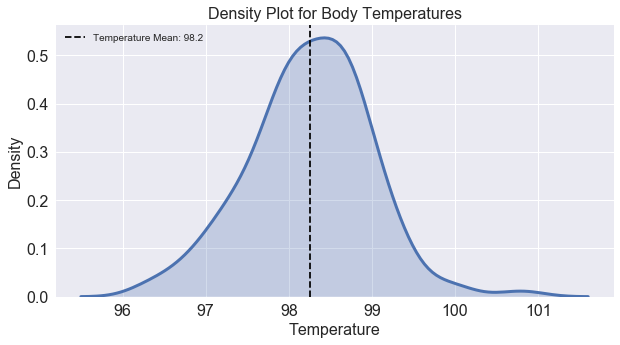

In [324]:
# Is the distribution of body temperatures normal?
#fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

#lbin = []
#lbin.append(mlist(96.0,.4,10))
#lbin.append(mlist(96.0,.4,12))

#for i in range(len(lbin)):
#    _ = hist_plots(df,lbin[i],i)
    
#import warnings

#with warnings.catch_warnings():
   # warnings.simplefilter("ignore")
    #fxn()
# density plot
temp_mean = df.temperature.mean()
print(temp_mean)
#fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(14,7))
temps = df['temperature']
binz = mlist(96.0,.4,11)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
_ = sns.distplot(temps, hist = False, bins=binz, kde = True,
                  kde_kws = {'shade': True, 'linewidth': 3})
_ = plt.title('Density Plot for Body Temperatures', fontsize=16)
_ = plt.xlabel('Temperature', fontsize=16)
_ = plt.ylabel('Density', fontsize=16)
_ = plt.tick_params(axis = 'x', which = 'major', labelsize = 16)
_ = plt.tick_params(axis = 'y', which = 'major', labelsize = 16)
_ = plt.axvline(x=temp_mean,color='k', linestyle='--',label='Temperature Mean: 98.2')
_ = plt.legend(loc='upper left')
plt.show()

<i>In this probability density plot, the data appear to be close to normally distributed. But since everything is so smoothed out, this could be deceiving. Another graphical method is a Q-Q plot.</i>

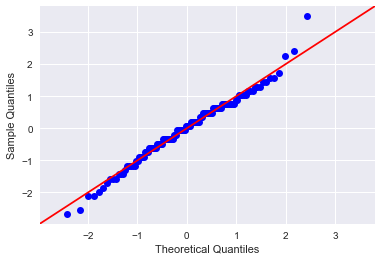

In [325]:
# q-q plot of all temperatures to test for normality

_ = sm.qqplot(temperature,  fit=True, line='45')
plt.show()

<i>Most of the values in the center fall on or near the line; the values in the tails seem to deviate from the theoretical normal distriubution. Now let's look at the CDF/ECDF plot</i>

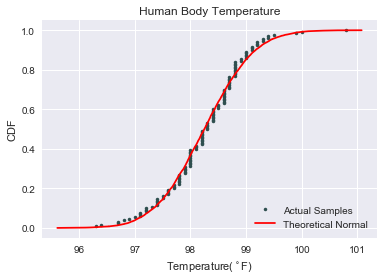

In [326]:
# Plots the ECDF and CDF of the human body temperatures
def ecdf(data):
    """
    Compute ECDF for a one-dimensional array of measurements.
    Returns tuple of arrays (x,y) that contain x and y values for ECDF.
    """
    x = np.sort(data)
    y = np.arange(1, len(x) + 1) / len(x)
    
    return x, y

x_ecdf, y_ecdf = ecdf(temperature)

temperature_theoretical = np.random.normal(np.mean(temperature), np.std(temperature), size=10000)

x_theoretical_cdf, y_theoretical_cdf = ecdf(temperature_theoretical)

plt.plot(x_ecdf, y_ecdf, marker='.', linestyle='none',color='darkslategray')
plt.plot(x_theoretical_cdf, y_theoretical_cdf, color='r')
plt.xlabel('Temperature($^\circ$F)')
plt.ylabel('CDF')
plt.title('Human Body Temperature')
plt.legend(('Actual Samples', 'Theoretical Normal'), loc='lower right')
plt.show()

The values line up pretty nicely with the ECDF curve suggesting that the distribition is normal.  But let's do some statistical tests to be sure.

<b><i>Statistical Normality Tests</i></b>

<u>Shapiro-Wilk Test</u>

In [327]:
# Shapiro-Wilk Test for normality
# on Human Body Temperature Data

from scipy.stats import shapiro

stat, p = shapiro(temperature)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Human Body Temperature Data Set looks Gaussian (fail to reject H0)')
else:
	print('Human Body Temperature Data Set does not look Gaussian (reject H0)')

Statistics=0.987, p=0.233
Human Body Temperature Data Set looks Gaussian (fail to reject H0)


<u>D’Agostino’s K<sup>2</sup> Test</u>

In [328]:
#D'Agostino's K^2 Test for Normality
# on Human Body Temperature Data

from scipy.stats import normaltest

# normality test
stat, p = normaltest(temperature)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Human Body Temperature Data Set looks Gaussian (fail to reject H0)')
else:
	print('Human Body Temperature Data Set does not look Gaussian (reject H0)')

Statistics=2.704, p=0.259
Human Body Temperature Data Set looks Gaussian (fail to reject H0)


<u>Anderson Darling Test</u>

In [329]:
#Anderson Darling Normality Test
# on Human Body Temperature Data

from scipy.stats import anderson
# normality test
result = anderson(temperature)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, Human Body Temperature Data Set looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, Human Body Temperature Data Set does not look normal (reject H0)' % (sl, cv))

Statistic: 0.520
15.000: 0.560, Human Body Temperature Data Set looks normal (fail to reject H0)
10.000: 0.637, Human Body Temperature Data Set looks normal (fail to reject H0)
5.000: 0.765, Human Body Temperature Data Set looks normal (fail to reject H0)
2.500: 0.892, Human Body Temperature Data Set looks normal (fail to reject H0)
1.000: 1.061, Human Body Temperature Data Set looks normal (fail to reject H0)


<h2><i><font color="blue">Question 1 Answer: Based on the graphical and statistical normality tests, I conclude that the data are normally distributed.</font></i></h2>
<hr>

<h2>2. Is the sample size large? Are the observations independent?</h2>
<ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>

<i>A rule of thumb is that a sample size >= 30 is large enough.</i>

In [330]:
# test CLT's 1st condition: sample size
if len(df) < 30:
    print("The sample size is too small (n < 30)")
else:
    print("The sample size is large (n > 30)")

The sample size is large (n > 30)


<i>The data set has a large sample size. Just out of curiosity...What if we wanted to just study male or female body temperatures?  Would we have a large enough sample size?  Yes. There are more than 30 data points for each gender (see below).</i>

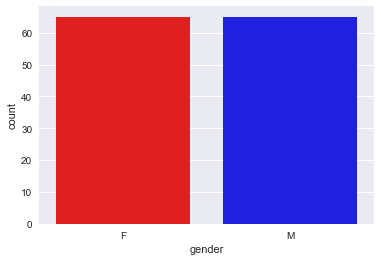

In [331]:
sns.countplot(df['gender'],palette=['red','blue'])

<i>Yes, the sample size for each gender is large enough too. The sample size is large enough.  But are the observations independent? <br>


The data were derived from:
<br>
<br>
Mackowiak, P. A.,
Wasserman, S. S., and Levine, M. M.  (1992), "A Critical Appraisal of
98.6 Degrees F, the Upper Limit of the Normal Body Temperature, and
Other Legacies of Carl Reinhold August Wunderlich," _Journal of the
American Medical Association_, 268, 1578-1580.

Because the data are from such a prestigious journal, it is probably fair to assume that the authors are very well educated and experienced researchers who have collected independent observations.  There is nothing that raises any red flags about the data collection.  If we have concerns, we can read the original journal article. But for now, I think it's reasonable to assume the observations are independent.
</i>



<h2><i><font color="blue">Question 2 Answer: The sample size is large enough (n >= 30) and the observations are independent.</font></i></h2>
<hr>


<h2>3. Is the true population mean really 98.6 degrees F?</h2>
<ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>

<h3>Bootstrap Hypothesis Test</h3>

Perform a one-sample bootstrap hypothesis test.  The mean of the Human Body Temperature Data Set is 98.2 (98.249231). 

Ho: Mean = 98.6 degrees F
Ha: Mean <> 98.6 degrees F

Test statistic is mean

Set significance level to be 0.05 (i.e. alpha = 0.05)

If p-value is less than alpha, reject the null hypothesis.
If p-value is greater than or equal to alpha, do not reject the null hypothesis.



In [332]:
alpha = 0.05

def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates


# Make an array of translated impact temperatures: translated_temperature
translated_temperature = temperature - np.mean(temperature) + 98.6

# Take bootstrap replicates of translated Human Body Temperatures: bs_replicates
bs_replicates = draw_bs_reps(translated_temperature, np.mean, 10000)

# Compute fraction of replicates that are less than the observed Human Body Temperatures: p
p = np.sum(bs_replicates <= np.mean(temperature)) / 10000

# Print the p-value
print('p = ', p)

if p < alpha:
    print('Reject the null hypothesis.')
else:
    print('Do not reject the null hypothesis.')
        


p =  0.0
Reject the null hypothesis.


<h3>Frequentist Statistical Testing</h3>

In [333]:
#Ho: Mean = 98.6
#Ha: Mean <> 98.6
#Significance level (alpha) = 0.05
#Test statistic is mean

In [334]:
#one sample z-test
from statsmodels.stats.weightstats import ztest

stat, p = ztest(x1=temperature, x2=None, value=98.6)
print('Test Statistic=%.3f, p=%.3f' % (stat, p))
if p<0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

Test Statistic=-5.455, p=0.000
Reject null hypothesis


In [335]:
#One-sample t-test
stat, p = stats.ttest_1samp(df.temperature, 98.6)
print('Test Statistic=%.3f, p=%.3f' % (stat, p))
if p<0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

Test Statistic=-5.455, p=0.000
Reject null hypothesis


<h2><i><font color="blue">Question 3 Answer: </i></h2></font><font color='blue'>No, the true population mean is not 98.6 degrees F.</h2>
<ul>
    <li> The null hypothesis that 98.6 is the mean was rejected using the bootstrap method.
    <li> The null hypothesis that 98.6 is the mean was rejected using the frequentist method. I used a one-sample test because we were testing the null hypothesis that one set of data had a mean equal to a set value.  If were were comparing two data sets to each other, the two-sample test would be appropriate. 
    <li> In this situation, is it appropriate to use the $z$ statistic because the sample size is large (>30).
    <li> I got the same result with the $t$ test.  This is because as the sample size increases, $t$ and $z$ converge. 
    </ul>
<hr></font>

<h2>4. Draw a small sample of size 10 from the data and repeat both frequentist tests.</h2>
<ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>

<i>Randomly sample ten temperatures.</i>

In [336]:
ten_temps = temperature.sample(n=10)
print(ten_temps)

113    99.1
46     97.4
49     97.1
31     97.6
34     99.3
73     98.8
7      98.8
126    97.7
82     97.5
95     96.8
Name: temperature, dtype: float64


<i><u>Z Test</u></i>

<i>Hypothesis Testing<p>
    H<sub>0</sub>: Mean human body temperature is 98.6 degrees F<p>
    H<sub>a</sub>: Mean human body temperature is not 98.6 degrees F<p>
    alpha = 0.05<p>
    test statistic is the mean
</i>

In [337]:
#Ho: Mean = 98.6
#Ha: Mean <> 98.6
#Significance level (alpha) = 0.05
#Test statistic is mean
#one sample z-test
from statsmodels.stats.weightstats import ztest

stat, p = ztest(x1=ten_temps, x2=None, value=98.6)
print('Test Statistic=%.3f, p=%.3f' % (stat, p))
if p<0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

Test Statistic=-2.073, p=0.038
Reject null hypothesis


<i><u>T Test</u></i>

<i>Hypothesis Testing<p>
    H<sub>0</sub>: Mean human body temperature is 98.6 degrees F<p>
    H<sub>a</sub>: Mean human body temperature is not 98.6 degrees F<p>
    alpha = 0.05<p>
    test statistic is the mean
</i>

In [338]:

#One-sample t-test
stat, p = stats.ttest_1samp(df.temperature, 98.6)
print('Test Statistic=%.3f, p=%.3f' % (stat, p))
if p<0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

Test Statistic=-5.455, p=0.000
Reject null hypothesis


Text(0.5,1,'Human Body Temperature (n=10)')

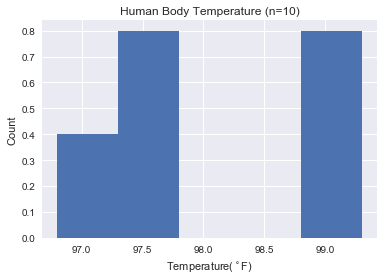

In [339]:
plt.hist(ten_temps, bins=10, density=True)
plt.xlabel('Temperature($^\circ$F)')
plt.ylabel('Count')
plt.title('Human Body Temperature (n=10)')

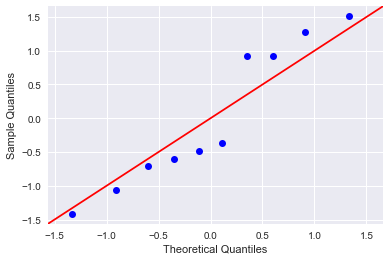

In [340]:
# q-q plot of all temperatures to test for normality

_ = sm.qqplot(ten_temps,  fit=True, line='45')
plt.show()

<h2><i><font color="blue">Question 4 Answer: </i></h2>
<ul>
    <li> <u>Which one is the correct one to use?</u>: <font color="blue">The T-test is the correct one to use because it is used for sample sizes less than 30.  Small samples like this are not normally distributed as can be seen by the histogram and Q-Q plots above.</font>
    <li> <u>What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?<u>: <font color="blue">I noticed that if I ran the test on different randomly selected sets of ten, sometimes the z test would reject the null hypothesis and sometimes it would fail to reject it, but that the T-test always rejected the null hypothesis. It tells me that, while the t-test can be used for large sample sizes, the t-test must always be used for small samples (less than 30) and the Z-test must never be used for small samples.</font>
    </ul>

<h2>5. At what temperature should we consider someone's temperature to be "abnormal"?</h2>
 <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>

margin of error = 0.06405661469519336
99% confidence interval = [98.08538077 98.41153846] body temperatures
(98.09833886093628, 98.40012267752527)


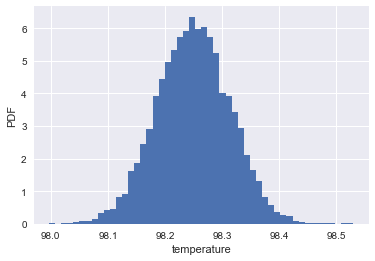

In [341]:
# P( [sample mean] - margin of error < μ < [sample mean] + margin of error) = 0.95

# frequentist approach
alpha = 0.05
cv95 = stats.t.ppf(1.0 - alpha, df.shape[0] - 1)

alpha = 0.01
cv99 = stats.t.ppf(1.0 - alpha, df.shape[0] - 1)


stddev = np.std(df.temperature)

sem = stddev / np.sqrt(df.shape[0])

# 95% confidence interval ... 99% confidence interval
ci_95 = (temp_mean - cv95 *sem,temp_mean + cv95 *sem )

ci_99 = (temp_mean - cv99 *sem,temp_mean + cv99 *sem )

# bootstrap approach
# Draw bootstrap replicates of the mean temperatures: bs_replicates
bs_replicates = draw_bs_reps(df.temperature,np.mean,10000)

# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates,[0.5,99.5])

# Print the margin of error
print("margin of error = " + str(sem))

# Print the confidence interval
print('99% confidence interval =', conf_int, 'body temperatures')

# frequentist 99% confidence interval
print(ci_99)

# Plot the histogram of the replicates
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel('temperature')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

<h2><i><font color="blue">Question 5 Answer: </font></i></h2> <font color="blue"><i>At a 99% confidence interval, we could consider an abnormal temperature to be 98.085 or lower and 98.416 or higher</i></font>

<h2>6. Is there a significant difference between males and females in normal temperature?</h2>
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>

<i>First, some EDA...</i>

In [363]:
#Subset the data into male and female groups
male_temps = df.loc[df['gender'] == 'M']
female_temps = df.loc[df['gender'] == 'F']

#List descriptive statistics
print("Male Body Temperatures")
print(male_temps.describe())
print()
print("Female Body Temperatures")
print(female_temps.describe())


Male Body Temperatures
       temperature  heart_rate
count    65.000000   65.000000
mean     98.104615   73.369231
std       0.698756    5.875184
min      96.300000   58.000000
25%      97.600000   70.000000
50%      98.100000   73.000000
75%      98.600000   78.000000
max      99.500000   86.000000

Female Body Temperatures
       temperature  heart_rate
count    65.000000   65.000000
mean     98.393846   74.153846
std       0.743488    8.105227
min      96.400000   57.000000
25%      98.000000   68.000000
50%      98.400000   76.000000
75%      98.800000   80.000000
max     100.800000   89.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c26e9fc18>]],
      dtype=object)

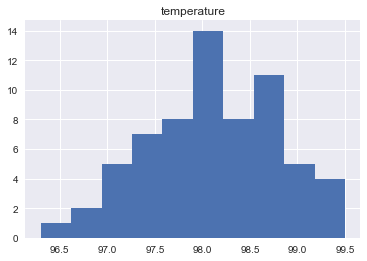

In [373]:
#Plot histogram of male body temperature data
male_temps.hist(column='temperature')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c25d17400>]],
      dtype=object)

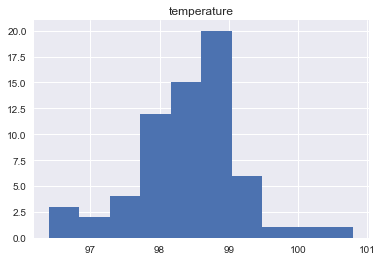

In [374]:
#Plot histogram of female body temperature data

female_temps.hist(column='temperature')

Text(0.5,1,'Male and Female Body Temperatures')

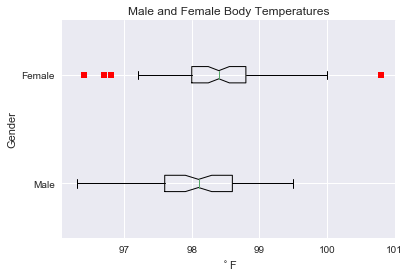

In [375]:
#Box-and-whisker plots of male and female temp data
plt.boxplot([male_temps['temperature'],female_temps['temperature']], 1, 'rs', 0, labels=['Male','Female'])

plt.xlabel('$^\circ$F')
plt.ylabel('Gender')
plt.title('Male and Female Body Temperatures')


<i>Hypothesis Testing<p>
    H<sub>0</sub>: There is no significant difference between the mean male and mean female body temperatures<p>
    H<sub>a</sub>: There is a significant difference between the mean male and mean female body temperatures<p>
    alpha = 0.05<p>
    test statistic is the mean
</i>

In [389]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1,data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

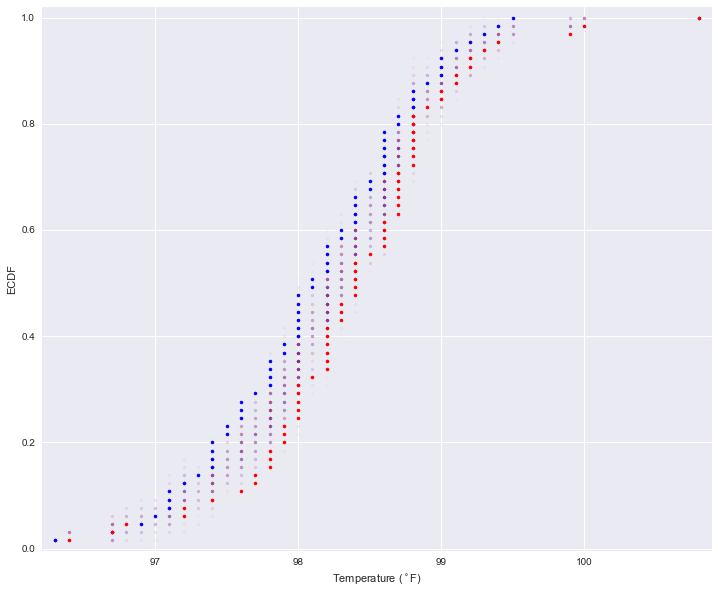

In [402]:

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,10))
for i in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(male_temps, female_temps)


    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

# Create and plot ECDFs from original data

x_1, y_1 = ecdf(male_temps)
x_2, y_2 = ecdf(female_temps)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='blue', label='male')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='red', label='female')


# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('Temperature ($^\circ$F)')
_ = plt.ylabel('ECDF')
plt.show()

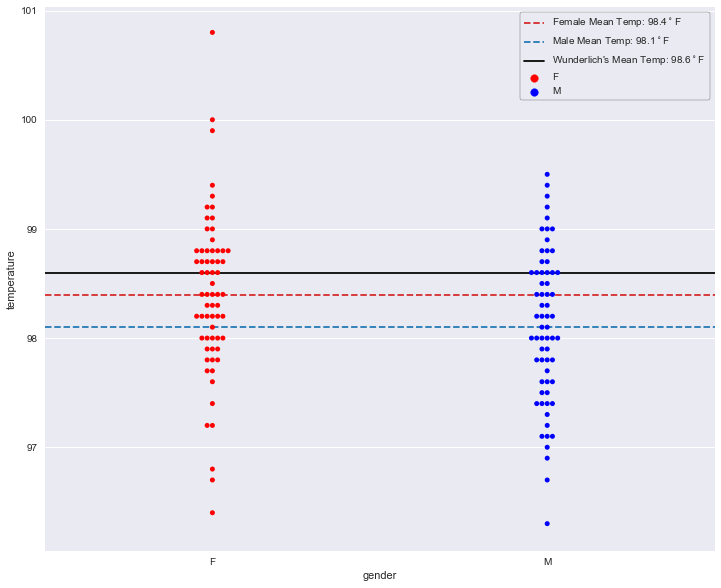

In [403]:
#Bee swarm plot
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,10))
female_temps = df.loc[df.gender == 'F', 'temperature']
male_temps = df.loc[df.gender == 'M', 'temperature']

mean_temp_male = np.mean(male_temps)
mean_temp_female = np.mean(female_temps)

_ = sns.swarmplot(x='gender', y='temperature',hue='gender', palette=['red','blue'],data=df)
_ = plt.axhline(y=mean_temp_female,color='tab:red', linestyle='--',label='Female Mean Temp: 98.4$^\circ$F' )
_ = plt.axhline(y=mean_temp_male,color='tab:blue', linestyle='--',label='Male Mean Temp: 98.1$^\circ$F' )
_ = plt.axhline(y=98.6 ,color='k', linestyle='-',label='Wunderlich\'s Mean Temp: 98.6$^\circ$F' )
plt.xlabel('gender')
plt.legend(loc=1,frameon=True).get_frame().set_edgecolor('k')
plt.show()

In [404]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

In [406]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1)-np.mean(data_2)

    return diff

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = np.mean(male_temps)-np.mean(female_temps)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(male_temps, female_temps,
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)
if p<0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

p-value = 0.9875
Fail to reject null hypothesis


<h2><i><font color="blue">Question 6 Answer: </i></h2></font>Is there a significant difference between males and females in normal temperature?  <font color="blue"><i>No, there is no siginficant difference between male and female normal body temperatures. The p-value of 0.9875 was not smaller than the alpha value of 0.05; therefore we failed to reject the null hypothesis that there is no difference in male and female normal body temperatures.</i></font>
    <ul>
    <li> What testing approach did you use and why?: <font color="blue"><i>I used a two-sample boot-strap sample with a z-statistic because two samples were being compared, the data were normally distributed, and the sample size of each group was large (n=65 for each gender; each being greater than 30).</i></font>
    <li> Write a story with your conclusion in the context of the original problem.  <font color="blue"><i>Since 1868, the normal human body temperature has been held to be 98.6$^{\circ}$F (37$^{\circ}$C) since Carl Wunderlich published his famous book. In this exercise, we have been asked to test whether this value statistically correct?  We have determined that the temperature data provided are normally distributed.  Both boot-strap and frequentist statistical methods resulted in rejecting the null-hypothesis that the mean normal human body temperature is 98.6$^{\circ}$F.  Further experiments are needed to determine a more accurate estimate of the true mean.  We also determined that male and female body temperatures are not statistically different. In other words, we failed to reject the null hypothesis that there was a difference in body temperature between males and females.</i></font>
    </ul>
    </font>